In [223]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

dataset = pd.read_csv('./weatherHistory.csv')
dataset.shape

(96453, 12)

In [224]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


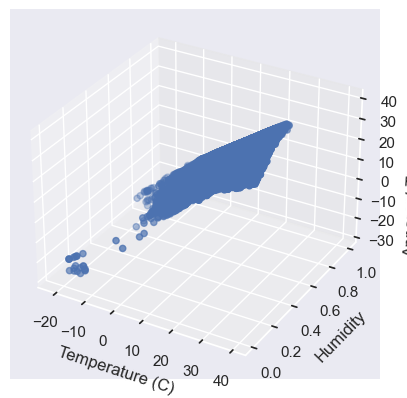

In [225]:

sns.set(style="darkgrid")
fig = plt.figure()

ax = fig.add_subplot( projection = '3d')

x = dataset['Temperature (C)']
y = dataset['Humidity']
z = dataset['Apparent Temperature (C)']

ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Humidity')
ax.set_zlabel('Apparent Temperature (C)')

ax.scatter(x, y, z)
plt.show()

Разделим датасет на тестовую и обучающую выборки с помощью train_test_split

In [226]:
from sklearn.model_selection import train_test_split
X = dataset[['Humidity', 'Temperature (C)']]
y = dataset[['Apparent Temperature (C)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучение

In [227]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
regressor.coef_

array([[2.28341749, 1.14155632]])

Коэффициенты регрессии

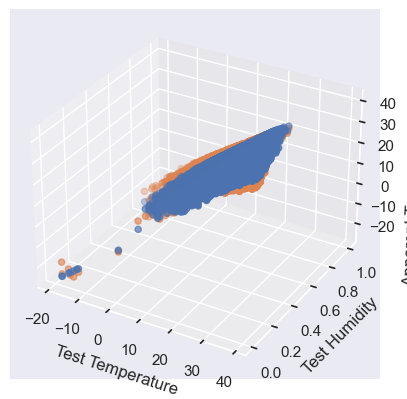

In [228]:
y_pred = regressor.predict(X_test)

fig = plt.figure()

ax = fig.add_subplot(projection = '3d')

x = X_test['Temperature (C)']
y = X_test['Humidity']
z = y_pred
n = y_test
ax.set_xlabel('Test Temperature')
ax.set_ylabel('Test Humidity')
ax.set_zlabel('Apparent Temperature (Predicted)')

ax.scatter(x, y, z)
ax.scatter(x, y, n)
plt.show()


In [229]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9458461039373592
Mean Squared Error: 1.562886999414246
Root Mean Squared Error: 1.2501547901816983


Множественная регрессия

In [230]:
X = dataset[['Humidity', 'Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)' ]]
y = dataset[['Apparent Temperature (C)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
regressor.coef_
y_pred = regressor.predict(X_test)

Оценим точность модели

In [231]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.8444717966845591
Mean Squared Error: 1.1583319916186081
Root Mean Squared Error: 1.0762583294073074


Видим, что с увеличением числа параметров множественной регрессии, точность предсказания увеличилась.

In [232]:
X_test

,Humidity,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
6119,0.93,14.422222,3.5581,273.0,1013.12
51443,0.72,12.155556,16.0678,329.0,1021.10
18754,0.61,23.961111,7.5831,9.0,1018.37
34070,0.87,15.000000,8.0500,70.0,1019.00
26082,0.77,12.800000,5.0876,28.0,1026.67
...,...,...,...,...,...
12953,0.37,28.888889,12.2199,194.0,1009.54
78272,0.93,17.216667,9.0804,224.0,1013.86
1985,0.92,-1.000000,4.7012,349.0,1033.34
82141,0.93,7.327778,4.5563,60.0,1014.97


In [233]:
humidity = input("Введите влажность")
temp = input("Введите температуру")
winds= input("Введите скорость ветра")
windb = input("Введите направление ветра")
pressure = input("Введите атм. давление")
d = {'Humidity': [humidity], 'Temperature (C)' : [temp], 'Wind Speed (km/h)' : [winds], 
 'Wind Bearing (degrees)': [windb], 'Pressure (millibars)': [pressure]}
df = pd.DataFrame(data=d)
y_pred = regressor.predict(df)
print("Predicted apparent temperature: ", y_pred)

Predicted apparent temperature:  [[11.94658941]]
